In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df = pd.read_csv("Titanic\\train.csv")

In [4]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

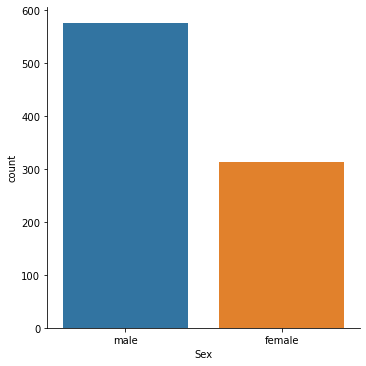

In [7]:
sns.catplot(x ="Sex", data=titanic_df, kind ="count")

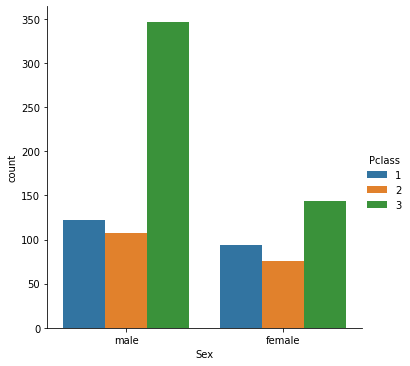

In [8]:
sns.catplot(x ="Sex", data=titanic_df,hue ="Pclass", kind ="count")

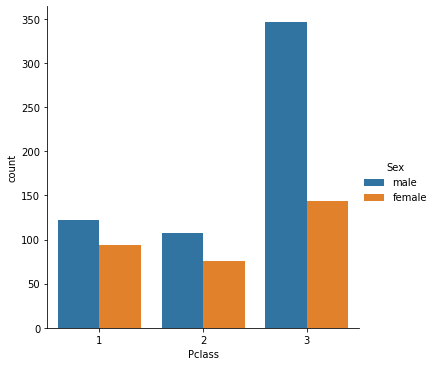

In [9]:
sns.catplot(x ="Pclass", data=titanic_df,hue ="Sex", kind ="count")

In [10]:
def mfc(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex
    

In [11]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(mfc, axis=1)

In [12]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


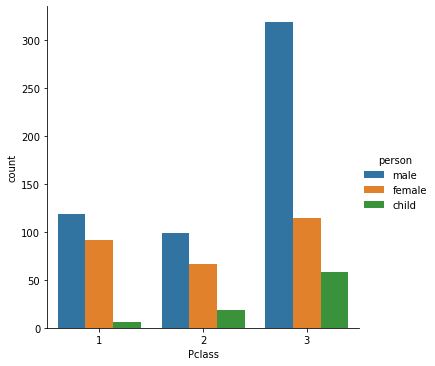

In [13]:
sns.catplot(x="Pclass",data=titanic_df,hue="person",kind="count")

<AxesSubplot:>

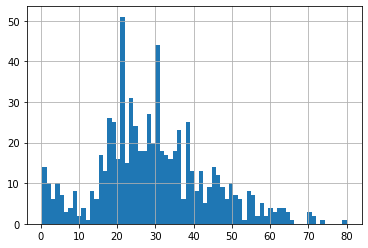

In [14]:
titanic_df['Age'].hist(bins=70)

In [15]:
titanic_df['Age'].mean()

29.69911764705882

In [16]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

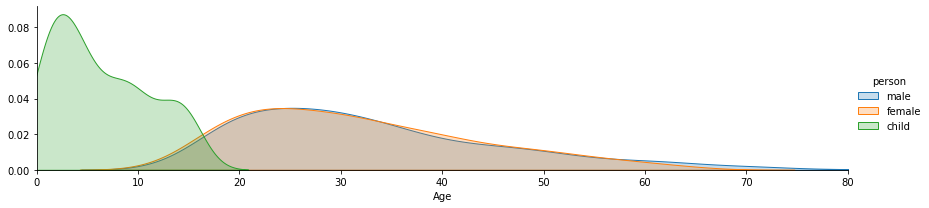

In [17]:
fig = sns.FacetGrid(titanic_df,hue="person",aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

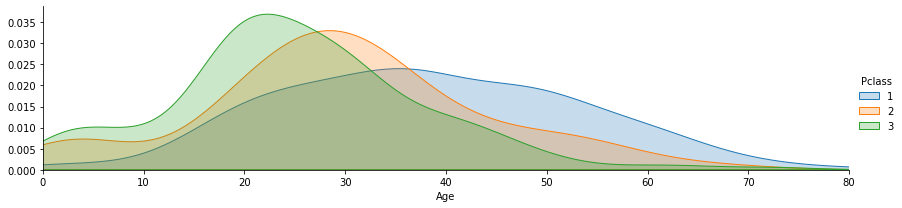

In [18]:
fig = sns.FacetGrid(titanic_df,hue="Pclass",aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

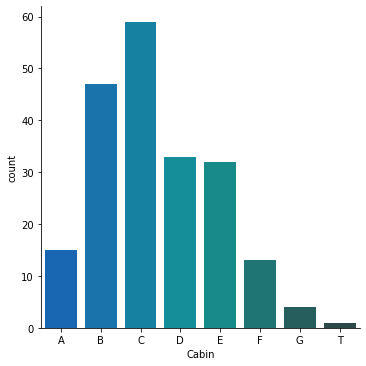

In [22]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

cabin_df = cabin_df.sort_values('Cabin')

sns.catplot(x = "Cabin",data = cabin_df, palette = 'winter_d', kind ="count")

    

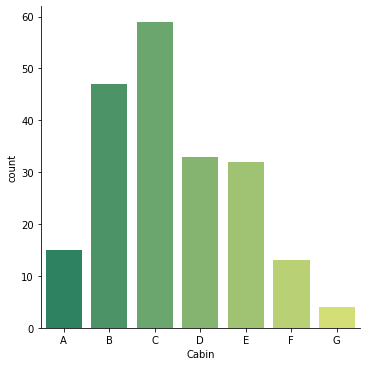

In [23]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.catplot(x = "Cabin",data = cabin_df, palette = 'summer', kind ="count")


In [24]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


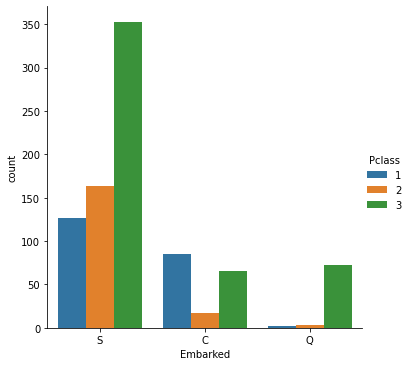

In [25]:
sns.catplot(x ="Embarked",data = titanic_df, hue ="Pclass", kind ="count")

In [26]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [27]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'No'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Yes'

C:\Users\Ankita Sharma\project\env\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Yes
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Yes


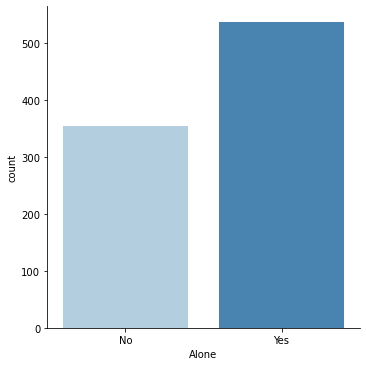

In [29]:
sns.catplot(x = "Alone", data = titanic_df,palette ='Blues', kind ="count")

In [30]:
titanic_df['Survivor'] = titanic_df['Survived'].map({0 : 'No', 1 : 'Yes'})

In [31]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Yes,No
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Yes,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,No,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Yes,Yes


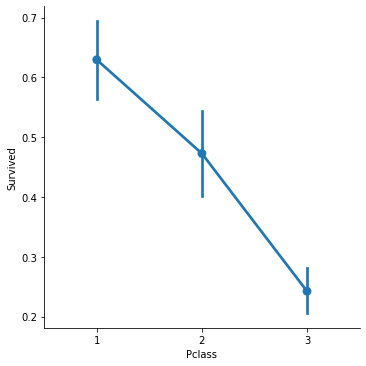

In [32]:
sns.catplot(x="Pclass",y="Survived",data = titanic_df, kind = "point")

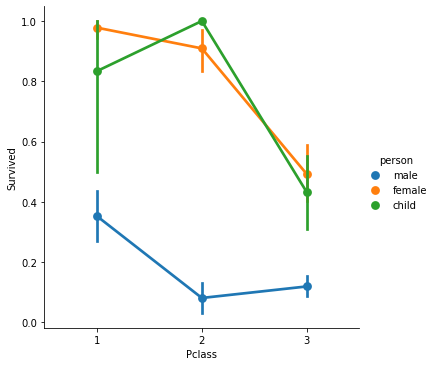

In [33]:
sns.catplot(x="Pclass",y="Survived",data = titanic_df,hue ="person", kind = "point")

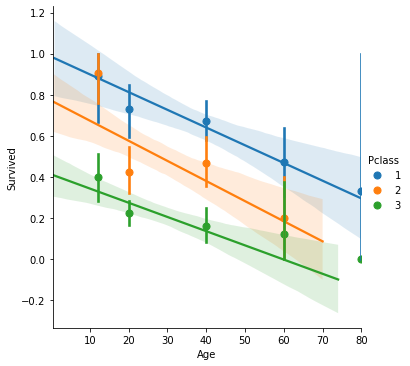

In [34]:
sns.lmplot(x ="Age",y ="Survived",data = titanic_df,hue="Pclass",x_bins = [12,20,40,60,80])

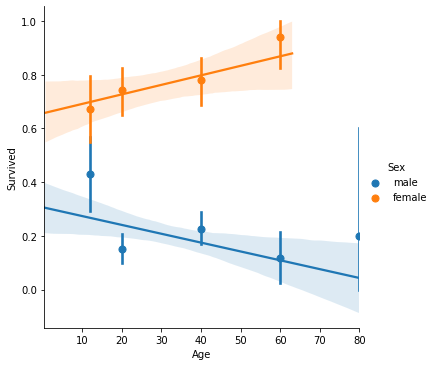

In [35]:
sns.lmplot(x ="Age",y ="Survived",data = titanic_df,hue="Sex",x_bins = [12,20,40,60,80])

In [36]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Yes,No
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Yes,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,No,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Yes,Yes


In [37]:
cabin_df

,Cabin
106,A
33,A
41,A
97,A
146,A
...,...
35,F
40,G
3,G
90,G


In [38]:
titanic_df['Cabin']=titanic_df['Cabin'].astype(str)

In [39]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
person          object
Alone           object
Survivor        object
dtype: object

In [40]:
titanic_df['Deck']=np.nan

In [41]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,male,No,No,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No,Yes,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,female,Yes,Yes,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No,Yes,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,male,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,nan,S,male,Yes,No,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Yes,Yes,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,nan,S,female,No,No,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Yes,Yes,NaN


In [70]:
titanic_df['Deck'] = titanic_df['Cabin'].str.slice(0,1)
titanic_df['Deck'] = titanic_df['Deck'].replace(['n',np.nan])

In [80]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,child,No,Yes,A
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,nan,S,female,Yes,Yes,A
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,nan,Q,female,Yes,Yes,A
212,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,nan,S,male,Yes,No,A
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,nan,S,female,Yes,Yes,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,nan,S,male,No,No,G
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,nan,S,child,No,Yes,G
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,nan,S,male,Yes,No,G
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S,male,Yes,No,T


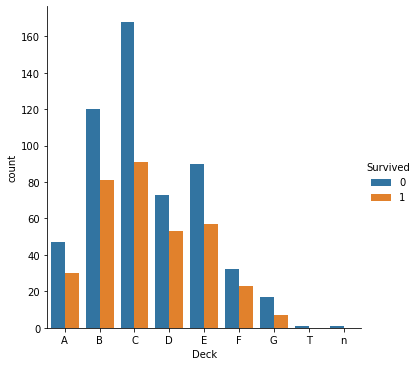

In [81]:
titanic_df = titanic_df.sort_values('Deck')
sns.catplot(x = "Deck",data = titanic_df, hue = "Survived", kind ="count")

In [92]:
titanic_deck_survival = titanic_df['Survived'].groupby(titanic_df['Deck'])

In [94]:
titanic_deck_survival.()

Deck
A     77
B    201
C    259
D    126
E    147
F     55
G     24
T      1
n      1
Name: Survived, dtype: int64

In [104]:
titanic_survived = titanic_df[titanic_df.Survived == 1]
titanic_death = titanic_df[titanic_df.Survived == 0]

In [123]:
titanic_survived_count = titanic_survived['Survived'].groupby(titanic_survived['Deck']).count()
titanic_survived_count

Deck
A    30
B    81
C    91
D    53
E    57
F    23
G     7
Name: Survived, dtype: int64

In [125]:
titanic_death_count = titanic_death['Survived'].groupby(titanic_death['Deck']).count()
titanic_death_count

Deck
A     47
B    120
C    168
D     73
E     90
F     32
G     17
T      1
n      1
Name: Survived, dtype: int64

In [2]:
titanic_cmbd = pd.merge(titanic_survived_count,titanic_death_count, how = 'left', on = 'Deck')
titanic_cmbd

NameError: name 'pd' is not defined

In [136]:
titanic_cmbd = titanic_cmbd.rename(columns={"Survived_x": "Survived_count", "Survived_y": "Death_count"})

In [139]:
titanic_cmbd['Survival_rate'] = (titanic_cmbd['Survived_count'])/(titanic_cmbd['Survived_count']+titanic_cmbd['Death_count'])
titanic_cmbd.sort_values("Survival_rate",ascending= False)

,Survived_count,Death_count,Survival_rate
Deck,,,
D,53,73,0.420635
F,23,32,0.418182
B,81,120,0.402985
A,30,47,0.389610
E,57,90,0.387755
C,91,168,0.351351
G,7,17,0.291667


In [149]:
titanic_cmbd = DataFrame(titanic_cmbd)
titanic_cmbd['Decks'] = titanic_cmbd.index

In [150]:
titanic_cmbd

,Survived_count,Death_count,Survival_rate,Decks
Deck,,,,
A,30,47,0.389610,A
B,81,120,0.402985,B
C,91,168,0.351351,C
D,53,73,0.420635,D
E,57,90,0.387755,E
F,23,32,0.418182,F
G,7,17,0.291667,G


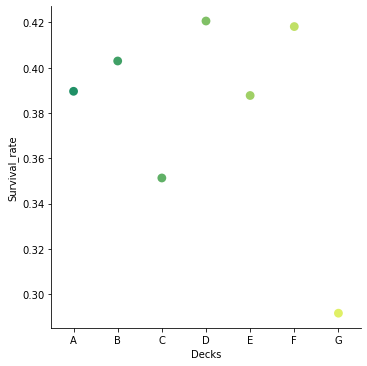

In [156]:
sns.catplot(x="Decks",y="Survival_rate",data=titanic_cmbd,kind="point",palette="summer")

In [157]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,child,No,Yes,A
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,nan,S,male,No,No,A
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,nan,C,female,No,Yes,A
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,nan,S,male,Yes,Yes,A
606,607,0,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,nan,S,male,Yes,No,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,nan,S,child,No,Yes,G
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,nan,S,male,Yes,No,G
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,nan,S,male,Yes,No,G
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S,male,Yes,No,T


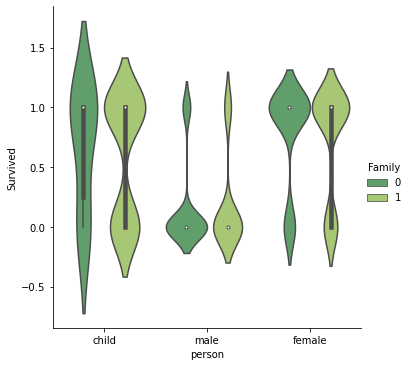

In [174]:
titanic_df['Family']=titanic_df['Alone'].map({'Yes':0,'No':1})
sns.catplot(x="person",y="Survived",data=titanic_df,hue="Family",palette ="summer",kind="violin")